## *Machine Learning approaches to the classification problem for autism spectrum disorder* 

Neste trabalho, utilizaremos o dataset público "Autistic Spectrum Disorder Screening Data for Adult" disponibilizado pelo [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#). O conjunto de dados foi doado pelo Prof. Fadi Thabtah, após a publicação do artigo ["Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment"](https://dl.acm.org/doi/10.1145/3107514.3107515). 


Os dados que investigamos aqui contêm pequenas alterações em relação ao conjunto original, como a remoção da variável 'age_desc' e registros com entradas ausentes ou formatadas incorretamente. 

*Abstract*: O Transtorno do Espectro Autista (TEA) é um transtorno do neurodesenvolvimento que impõe altos custos à saúde pública e aos indivíduos afetados, sendo que um diagnóstico precoce pode reduzir significativamente esses custos. No entanto, tempo para um  diagnóstico preciso de TEA costuma ser longo e não trata-se de uma tarefa trivial. Diante do impacto econômico do autismo e do crescimento mundial no número de casos de TEA, torna-se urgente o desenvolvimento de métodos de triagem que sejam tanto eficientes quanto acessíveis. Uma triagem eficaz e de rápida implementação ajudaria a orientar os profissionais de saúde e informar os indivíduos sobre a necessidade de uma avaliação clínica formal. O aumento no número de casos de TEA no mundo ressalta a importância de conjuntos de dados focados em traços comportamentais, que ainda são raros e limitam análises mais profundas para aprimorar a eficiência,  sensibilidade, especificidade e precisão preditiva dos processos de triagem. 

Este trabalho propõe a análise de um conjunto de dados voltado para a triagem de autismo em adultos, com 20 variáveis que possibilitam identificar traços influentes e melhorar a classificação de casos de TEA. 

O conjunto de dados inclui respostas de indíviduos entrevistados, já diagnosticados ou não com TEA, para dez variáveis comportamentais (AQ-10-Adult) e dez características individuais, que têm se mostrado eficazes em detectar casos de TEA em estudos comportamentais.



### Conteúdos: 
* 1. Importação dos datasets 
* 2. Análise preliminar
* 3. Limpeza dos datasets
* 4. Análise descritiva 
* 5. Modelo de aprendizado supervisionado





## 1. Importação dos datasets

Iniciamos o tratamento do dataset e sua preparação importando o arquivo 'autism-screening' como um dataframe Pandas.

In [105]:
import pandas as pd 
import numpy as np 

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [106]:
df = pd.read_csv("data/autism_screening.csv")

df.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [107]:
#Dimensões do dataset
print("Número de instâncias:", df.shape[0])
print("Número de features:", df.shape[1])

# Colunas (features) do dataset
df.columns


Número de instâncias: 704
Número de features: 21


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

Verificamos que o dataset possui 704 instâncias e 21 features, conforme descrito na página onde o dataset encontra-se [disponível](https://archive.ics.uci.edu/dataset/426/autism+screening+adult#). Nele, também encontramos uma descrição do dataset e de suas features, que pode ser originalmente acessado pelo pdf. Relacionaremos aqui as colunas no dataframe, com a descrição e interpretação dessas features e como essas estão armazenadas, isto é, seu tipo. 



In [108]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

| **Atributo**            | **Nome da Variável**    | **Tipo**                   | **Descrição**                                                                 |
|-------------------------|-------------------------|----------------------------|------------------------------------------------------------------------------|
| Idade                   | age                     | Númerico (float)             | Idade em anos                                                                |
| Gênero                  | gendar                  | String (m/f)               | Gênero                                                                       |
| Etnia                   | ethnicity               | String                     | Etnias do participante em formato de texto                                   |
| Icterícia ao nascer     | jundice                 | String [yes/no]           | Indica se o indivíduo teve icterícia ao nascer                               |
| Autismo na família      | autism                  | String                   | Indica se há histórico de autismo em membros da família                      |
| País de residência      | country_of_res          | String                     | País de residência do participante em formato de texto                                          |
| Uso anterior do app     | used_app_before         | String [yes/no]           | Indica se o indivíduo já utilizou o app anteriormente                        |
| Relacionamento          | relation                | String                     | Quem está realizando o teste (parent, self, caregiver, medical staff, etc.)   |
| Tipo de método de triagem | screening_method_type  | String                     | Método de triagem utilizado                                                  |
| Perguntas 1 a 10        | A1-10_Score    | Binário [0,1]              | Respostas para as perguntas baseadas no método de triagem                    |
| Pontuação da Triagem    | result                  | Numérico (inteiro)                    | Pontuação final obtida com base no método de triagem. O valor foi computado de maneira automatizada
| Diagnóstico | Class/ASD |  String ["YES"/"NO"] | Indica se o paciente é diagnosticado ou não com autismo.              


## 2. Pré-processamento dos dados
Antes de utilizarmos uma base de dados para análises ou como entrada para modelos de *machine learning*, estes precisam ser limpos e formatados, e até mesmo reestruturados, para que esses sejam interpretados de forma adequada computacionalmente e também para os algoritmos de aprendizado de máquina. A etapa de pré-processamento é fundamental, pois pode ajudar nos resultados de análises e no poder preditivo de algoritmos de aprendizado.

Algo que é perceptível ao visualizar o dataset é a existência de valores faltantes para alguns atributos, conforme o esperado, uma vez que na descrição do dataset nos é informado que existem valores faltantes. Entretanto, estes estão simplesmente representados pelo caractere '?' e não por um valor nulo de fato. Como consequência, ao não se atentar a esse ponto e simplesmente utilizarmos o método info() pela biblioteca Pandas, estes não serão identificados. 


In [109]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

### 2.1 Análise dos atributos

Nesse ponto, realizaremos uma análise mais detalhada das nossas features (atributos): 

* análise de valores nulos
* nome das colunas
* identificação dos valores únicos

Como pontuado anteriormente, os valores faltantes não estão explicitamente (claros) no dataset. Portanto, para iniciar esse pré-processamento dos dados vamos realizar essa substituição.



In [110]:
df = df.replace('?', np.nan) 

Antes de aprofundarmos na análise do dataset, vamos renomear as colunas de forma que tornem-as mais representativas, facilitando a compreensão e futuras análises.

In [111]:
df = df.rename(columns={'austim' : 'relative_with_autism', 'contry_of_res' : 'country_of_residence', 'Class/ASD' : 'diagnosis'})

In [112]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   A1_Score              704 non-null    int64  
 1   A2_Score              704 non-null    int64  
 2   A3_Score              704 non-null    int64  
 3   A4_Score              704 non-null    int64  
 4   A5_Score              704 non-null    int64  
 5   A6_Score              704 non-null    int64  
 6   A7_Score              704 non-null    int64  
 7   A8_Score              704 non-null    int64  
 8   A9_Score              704 non-null    int64  
 9   A10_Score             704 non-null    int64  
 10  age                   702 non-null    float64
 11  gender                704 non-null    object 
 12  ethnicity             609 non-null    object 
 13  jundice               704 non-null    object 
 14  relative_with_autism  704 non-null    object 
 15  country_of_residence  7

Após uma representação explicíta dos valores nulos em nosso dataset, verificamos que existem instâncias com valores faltantes de *relation*, que refere-se a pessoa que realizou o teste, *ethnicity*, etnia do participante e *age*, sua idade. 

Com o método .loc(), podemos localizar as instâncias que possuem essas features faltantes. 

In [113]:
df_null = df.loc[(df['age'].isnull()) | (df['relation'].isnull()) | (df['ethnicity'].isnull())]
df_null

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,relative_with_autism,country_of_residence,used_app_before,result,age_desc,relation,diagnosis
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
12,0,1,1,1,1,1,0,0,1,0,...,f,NaN,no,no,Bahamas,no,6.0,18 and more,NaN,NO
13,1,0,0,0,0,0,1,1,0,1,...,m,NaN,no,no,Austria,no,4.0,18 and more,NaN,NO
14,1,0,0,0,0,0,1,1,0,1,...,f,NaN,no,no,Argentina,no,4.0,18 and more,NaN,NO
19,0,0,0,0,0,0,1,1,0,1,...,m,NaN,yes,no,United Arab Emirates,no,3.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,United States,no,1.0,18 and more,NaN,NO
658,0,0,1,1,0,0,1,0,0,0,...,m,NaN,no,no,Azerbaijan,no,3.0,18 and more,NaN,NO
659,1,1,1,1,1,1,0,0,1,1,...,m,NaN,no,no,Pakistan,no,8.0,18 and more,NaN,YES
666,0,0,0,0,0,0,0,1,0,0,...,m,NaN,no,no,Iraq,no,1.0,18 and more,NaN,NO


Tendo conhecimento das 95 instâncias que possuem esse valores nulos, podemos analisar, futuramente, o impacto dessas features no treinamento e resultado do nosso modelo.

 Nesse ponto, adentramos na discussão em como lidar com os valores faltantes. Um dado faltante pode ter diferentes origens: seja por erro na inserção manual, erro de digitação ou o dado pode simplesmente não existir. Uma das formas mais simples de lidarmos com os dados faltantes é optando pela remoção destes. 
 
 Em outras palavras, mantendo apenas as instâncias que apresentarem todos os dados completos, estratégia que será adotada.



In [114]:
df.dropna(inplace=True)

Vamos partir para uma análise mais detalhada das features e seus valores.

In [115]:
df.nunique() 

A1_Score                 2
A2_Score                 2
A3_Score                 2
A4_Score                 2
A5_Score                 2
A6_Score                 2
A7_Score                 2
A8_Score                 2
A9_Score                 2
A10_Score                2
age                     46
gender                   2
ethnicity               11
jundice                  2
relative_with_autism     2
country_of_residence    60
used_app_before          2
result                  11
age_desc                 1
relation                 5
diagnosis                2
dtype: int64

Aplicando o método .nunique(), podemos analisar os valores únicos das variáveis. Etapa necessária garantir que a substituição dos valores string para as variáveis binárias ocorrerá adequadamente. 

* Valores para as saídas binárias, isto é, a existência de apenas dois valores únicos.

* Age_desc possui apenas um único valor, sendo "18 and more", portanto significa que não trará contribuição para futuros modelos nem para a análise. 


In [116]:
df = df.replace({"yes" : 1, "no": 0})
df = df.replace({"YES" : 1, "NO": 0})

df.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,relative_with_autism,country_of_residence,used_app_before,result,age_desc,relation,diagnosis
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,0,1,United States,0,6.0,18 and more,Self,0
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,1,0,United States,0,9.0,18 and more,Self,1


Analisando de maneira aprofundada os valores das features:



In [117]:
#Separar as features categóricas e as numéricas
categoric_columns = [column for column in df.columns if df[column].dtype == 'object'] 
numeric_columns = [column for column in df.columns if df[column].dtype != 'object']

print("Variáveis categóricas: ", categoric_columns)

print("Variáveis numéricas: ",  numeric_columns)

Variáveis categóricas:  ['gender', 'ethnicity', 'country_of_residence', 'age_desc', 'relation']
Variáveis numéricas:  ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'jundice', 'relative_with_autism', 'used_app_before', 'result', 'diagnosis']


Valores únicos para cada uma das features categóricas

In [118]:
for column in categoric_columns: 
    print(f"{column} --> valores: {df[column].unique()}\n")

gender --> valores: ['f' 'm']

ethnicity --> valores: ['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

country_of_residence --> valores: ['United States' 'Brazil' 'Spain' 'New Zealand' 'Bahamas' 'Burundi'
 'Jordan' 'Ireland' 'United Arab Emirates' 'Afghanistan' 'United Kingdom'
 'South Africa' 'Italy' 'Pakistan' 'Egypt' 'Bangladesh' 'Chile' 'France'
 'China' 'Australia' 'Canada' 'Saudi Arabia' 'Netherlands' 'Romania'
 'Sweden' 'Tonga' 'Oman' 'India' 'Philippines' 'Sri Lanka' 'Sierra Leone'
 'Ethiopia' 'Viet Nam' 'Iran' 'Costa Rica' 'Germany' 'Mexico' 'Armenia'
 'Iceland' 'Nicaragua' 'Austria' 'Russia' 'AmericanSamoa' 'Uruguay'
 'Ukraine' 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium'
 'Bolivia' 'Aruba' 'Finland' 'Turkey' 'Nepal' 'Indonesia' 'Angola'
 'Czech Republic' 'Cyprus']

age_desc --> valores: ['18 and more']

relation --> valores: ['Self' 'Parent' 'Health care professional' 'Relative' 'Oth

O valor "Others" se encontra repetido na variável etnia. Portanto, vamos realizar essa assimilação apenas para "Others"

In [119]:
df['ethnicity'] = df['ethnicity'].replace({'others' : "Others"})

print(df['ethnicity'].unique())

['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish']


Agora para as variáveis numéricas

In [120]:
for column in numeric_columns: 
    print(f"{column} --> valores: {df[column].unique()}\n")

A1_Score --> valores: [1 0]

A2_Score --> valores: [1 0]

A3_Score --> valores: [1 0]

A4_Score --> valores: [1 0]

A5_Score --> valores: [0 1]

A6_Score --> valores: [0 1]

A7_Score --> valores: [1 0]

A8_Score --> valores: [1 0]

A9_Score --> valores: [0 1]

A10_Score --> valores: [0 1]

age --> valores: [ 26.  24.  27.  35.  36.  17.  64.  29.  33.  18.  31.  30.  42.  40.
  48.  37.  55.  50.  34.  53.  20.  28.  21. 383.  47.  43.  32.  44.
  19.  58.  22.  39.  25.  23.  38.  54.  60.  41.  46.  45.  56.  61.
  59.  52.  49.  51.]

jundice --> valores: [0 1]

relative_with_autism --> valores: [0 1]

used_app_before --> valores: [0 1]

result --> valores: [ 6.  5.  8.  9.  2. 10.  3.  0.  1.  4.  7.]

diagnosis --> valores: [0 1]



*age*  e *result* possuem apenas valores discretos, apesar de estarem representados como float64 no dataframe. Apesar dessas variáveis discretas estarem erroneamente representadas como float, isso não se apresenta como um prejuízo real para análises ou o desempenho dos modelos preditivos. 

Portanto, o ajuste para tipo int representa apenas uma precisão de representação e boas práticas, reforçando a semântica das variáveis. 

* age (float64) -> int
* result (float64) -> int

In [121]:
# Transformação do tipo dos dados

df['age'] = df['age'].astype('Int64')
df['result'] = df['result'].astype('Int64')


In [122]:
df.describe() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jundice,relative_with_autism,used_app_before,result,diagnosis
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.0,609.000000,609.000000,609.00000,609.0,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,0.096880,0.139573,0.01642,5.077176,0.295567
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.28747,0.296038,0.346828,0.12719,2.522717,0.456672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,0.000000,0.000000,0.00000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.0,0.000000,0.000000,0.00000,3.0,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.0,0.000000,0.000000,0.00000,5.0,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.0,0.000000,0.000000,0.00000,7.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.0,1.000000,1.000000,1.00000,10.0,1.000000


### 2.1 Finalizando o processamento

* Remoção dos valores nulos
* Renomeação das colunas
* Transformação dos tipos errôneos
* Compreensão das variáveis categóricas e numéricas

In [123]:
#Reminder of the features:
print(df.dtypes)

number_records = len(df)
number_with_asd = len(df[df['diagnosis'] == 1])
number_with_no_asd = len(df[df['diagnosis'] == 0])

print( "Número total de instâncias: ", number_records)
print("Número de indivíduos diagnosticados com ASD: ", number_with_asd)
print("Número de indivíduos que não foram diagnosticados com ASD: ", number_with_no_asd)



A1_Score                 int64
A2_Score                 int64
A3_Score                 int64
A4_Score                 int64
A5_Score                 int64
A6_Score                 int64
A7_Score                 int64
A8_Score                 int64
A9_Score                 int64
A10_Score                int64
age                      Int64
gender                  object
ethnicity               object
jundice                  int64
relative_with_autism     int64
country_of_residence    object
used_app_before          int64
result                   Int64
age_desc                object
relation                object
diagnosis                int64
dtype: object
Número total de instâncias:  609
Número de indivíduos diagnosticados com ASD:  180
Número de indivíduos que não foram diagnosticados com ASD:  429


## 3. Visualização e análise descritiva

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style = 'whitegrid', color_codes=True)

O valor do modelo preditivo a ser desenvolvido consiste na sua capacidade de generalização. Para isso, um conjunto de treinamento que seja suficientemente representativo ou significativo e que contenha todos os traços característico numa proporcão relativa à população alvo do estudo. 

<Axes: xlabel='diagnosis', ylabel='count'>

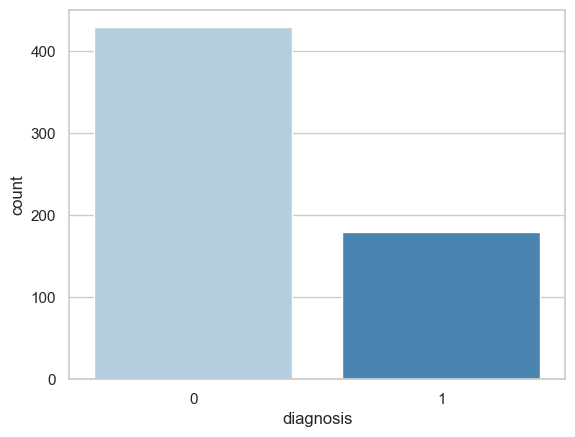

In [125]:
sns.countplot(data=df, x = 'diagnosis', palette='Blues')


In [126]:
per_diagnosed_asd = (number_with_asd / number_records) * 100

print(f"Porcentagem de indivíduos diagnosticados com autismo: {per_diagnosed_asd:.2f}%")

Porcentagem de indivíduos diagnosticados com autismo: 29.56%


#### Dados desbalanceados 
Como visível, a quantidade de indivíduos que não são diagnosticados com autismo predomina no nosso dataset, correspondendo a aproximadamente 70% da amostra na classe 0. Esse desequilíbrio entre as classes é um aspecto a ser considerado durante a divisão do dataset para o treinamento de modelos preditivos. Para garantir que o modelo tenha uma boa capacidade de generalização, deve lhe ser apresentado um conjunto de treinamento que represente adequadamente ambas as classes, evitando assim que o modelo apresente viés em direção à classe majoritária. 

Contexto do autismo

* Nesse contexto, estratégias de balanceamento, como o ajuste proporcional da amostragem podem ser empregadas para a mitigação do problema.

### Medidas descritivas

In [127]:
df.describe() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jundice,relative_with_autism,used_app_before,result,diagnosis
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.0,609.000000,609.000000,609.00000,609.0,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,0.096880,0.139573,0.01642,5.077176,0.295567
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.28747,0.296038,0.346828,0.12719,2.522717,0.456672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,0.000000,0.000000,0.00000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.0,0.000000,0.000000,0.00000,3.0,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.0,0.000000,0.000000,0.00000,5.0,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.0,0.000000,0.000000,0.00000,7.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.0,1.000000,1.000000,1.00000,10.0,1.000000




* Idade (*age*)

    A idade dos participantes varia de 17 a 383 anos, revelando a presença de um outlier, que provavelmente resulta de um erro. A identificação precoce deste valor atípico evita a distorção de estatísticas como a média e desvio padrão. Optaremos pela remoção dessa instância.


* Jundice e autism

    A variável jundice (icterícia) é representada como um dado binário (0 ou 1), com uma média de 0,096, indicando que apenas uma pequena fração dos indivíduos no conjunto de dados teve histórico de icterícia ao nascimento. A variável autism, que reflete se o indivíduo tem um membro da família com PDD (Perturbação do Desenvolvimento Pessoal), apresenta uma média de 0,139, sugerindo que a maioria dos participantes também não reporta histórico familiar de transtornos relacionados ao autismo.A variável used_app_before, também binária, mostra que a maioria dos indivíduos não utilizou o aplicativo anteriormente, o que pode impactar a familiaridade com o processo de triagem e, consequentemente, os resultados obtidos.
    

* Result

    Variável que representa a pontuação final obtida na triagem, tem uma média de 5,08, com um intervalo de 0 a 10. A distribuição dos resultados indica que há uma concentração de pontuações em torno dos valores intermediários.







In [128]:
df = df[df['age'] != 383]

In [129]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jundice,relative_with_autism,used_app_before,result,diagnosis
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.0,608.000000,608.000000,608.000000,608.0,608.000000
mean,0.740132,0.470395,0.481908,0.521382,0.526316,0.307566,0.429276,0.666118,0.342105,0.598684,29.634868,0.097039,0.139803,0.016447,5.083882,0.296053
std,0.438923,0.499534,0.500084,0.499954,0.499718,0.461866,0.495380,0.471986,0.474805,0.490568,9.69408,0.296255,0.347068,0.127293,2.519356,0.456890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.0,0.000000,0.000000,0.000000,3.0,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.0,0.000000,0.000000,0.000000,5.0,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.0,0.000000,0.000000,0.000000,7.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.0,1.000000,1.000000,1.000000,10.0,1.000000


Para as variáveis categóricas e binárias, como gênero, etnia, país de residência, e a presença de histórico familiar de TEA, empregaremos os gráficos de barras para facilitar na visualização e entendimento das proporções e do perfil típico dos pacientes.

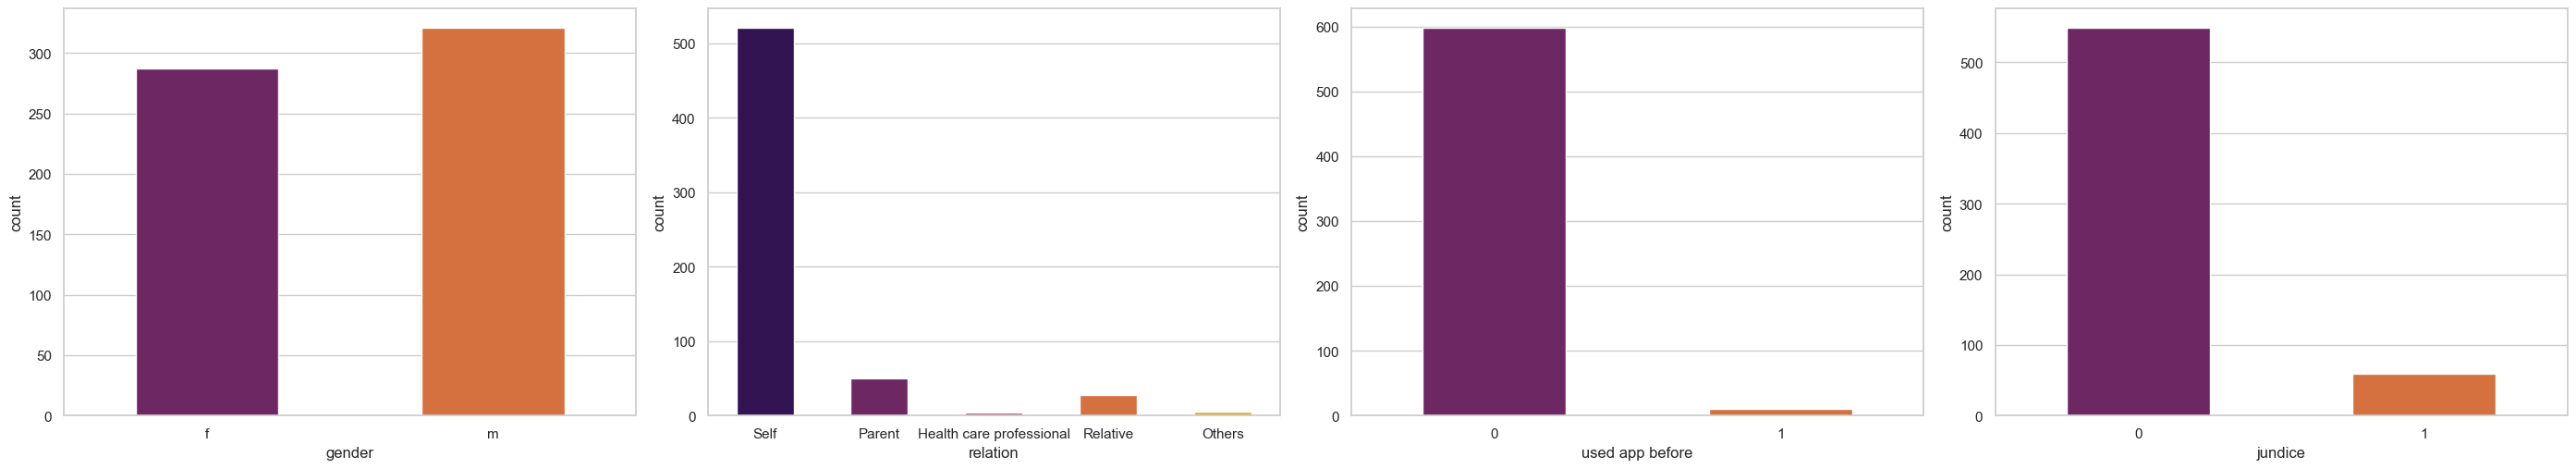

In [130]:

plt.figure(figsize=(35, 25))

# Gender plot

ax = plt.subplot(5,5, 1)
sns.countplot(df, x = 'gender', width = 0.5, palette='inferno')
plt.xlabel('gender')


# Relation plot 
ax = plt.subplot(5, 5, 2)
sns.countplot(df, x = 'relation', width = 0.5, palette = 'inferno')
plt.xlabel('relation')

# used_app_before
ax = plt.subplot(5, 5, 3)
sns.countplot(df, x = 'used_app_before', width = 0.5, palette = 'inferno')
plt.xlabel('used app before')

ax = plt.subplot(5, 5, 4)
sns.countplot(df, x = 'jundice', width = 0.5, palette = 'inferno')
plt.xlabel('jundice')

plt.tight_layout() 
plt.show()


* O gênero predominante entre os participantes é o masculino, embora a diferença entre os gêneros não seja significativa, indicando uma boa representatividade. 

* A maioria dos indivíduos que se submeteram ao teste é composta por aqueles que se autoavaliaram, destacando a relevância da autoavaliação no contexto da triagem do Transtorno do Espectro Autista (TEA). 

* Observa-se que a maior parte dos participantes não utilizou o aplicativo anteriormente. 

* Por fim, a minoria dos indivíduos relatou não ter tido histórico de icterícia ao nascer. 

Esses insights contribuem para uma compreensão mais aprofundada do perfil dos indivíduos analisados e podem orientar futuras investigações sobre os fatores associados ao TEA.

In [131]:
# Função para calcular e formatar a porcentagem
def calculate_percentage(column, mappings):
    counts = column.value_counts()
    percentage = (counts / len(df)) * 100
    percentage.index = percentage.index.map(mappings)
    return percentage

# Definindo os mapeamentos
gender_mappings = {'m': 'Masculino', 'f': 'Feminino'}
relation_mappings = {
    'Parent': 'Pai/Mãe',
    'Self': 'Autoavaliação',
    'Relative': 'Parente',
    'Health care professional': 'Profissional de Saúde',
    'Others': 'Outros'
}
used_app_mappings = {1: 'Sim', 0: 'Não'}  # Ajuste conforme necessário
jundice_mappings = {1: 'Sim', 0: 'Não'}  # Ajuste conforme necessário

# Cálculo e impressão das porcentagens
print("Porcentagem de indivíduos por gênero:")
print(calculate_percentage(df['gender'], gender_mappings))

print("\nPorcentagem de respostas ao teste:")
print(calculate_percentage(df['relation'], relation_mappings))

print("\nPorcentagem de indivíduos que utilizaram o aplicativo antes:")
print(calculate_percentage(df['used_app_before'], used_app_mappings))

print("\nPorcentagem de indivíduos com histórico de icterícia ao nascer:")
print(calculate_percentage(df['jundice'], jundice_mappings))


Porcentagem de indivíduos por gênero:
gender
Masculino    52.796053
Feminino     47.203947
Name: count, dtype: float64

Porcentagem de respostas ao teste:
relation
Autoavaliação            85.690789
Pai/Mãe                   8.223684
Parente                   4.605263
Outros                    0.822368
Profissional de Saúde     0.657895
Name: count, dtype: float64

Porcentagem de indivíduos que utilizaram o aplicativo antes:
used_app_before
Não    98.355263
Sim     1.644737
Name: count, dtype: float64

Porcentagem de indivíduos com histórico de icterícia ao nascer:
jundice
Não    90.296053
Sim     9.703947
Name: count, dtype: float64


<Axes: xlabel='ethnicity', ylabel='count'>

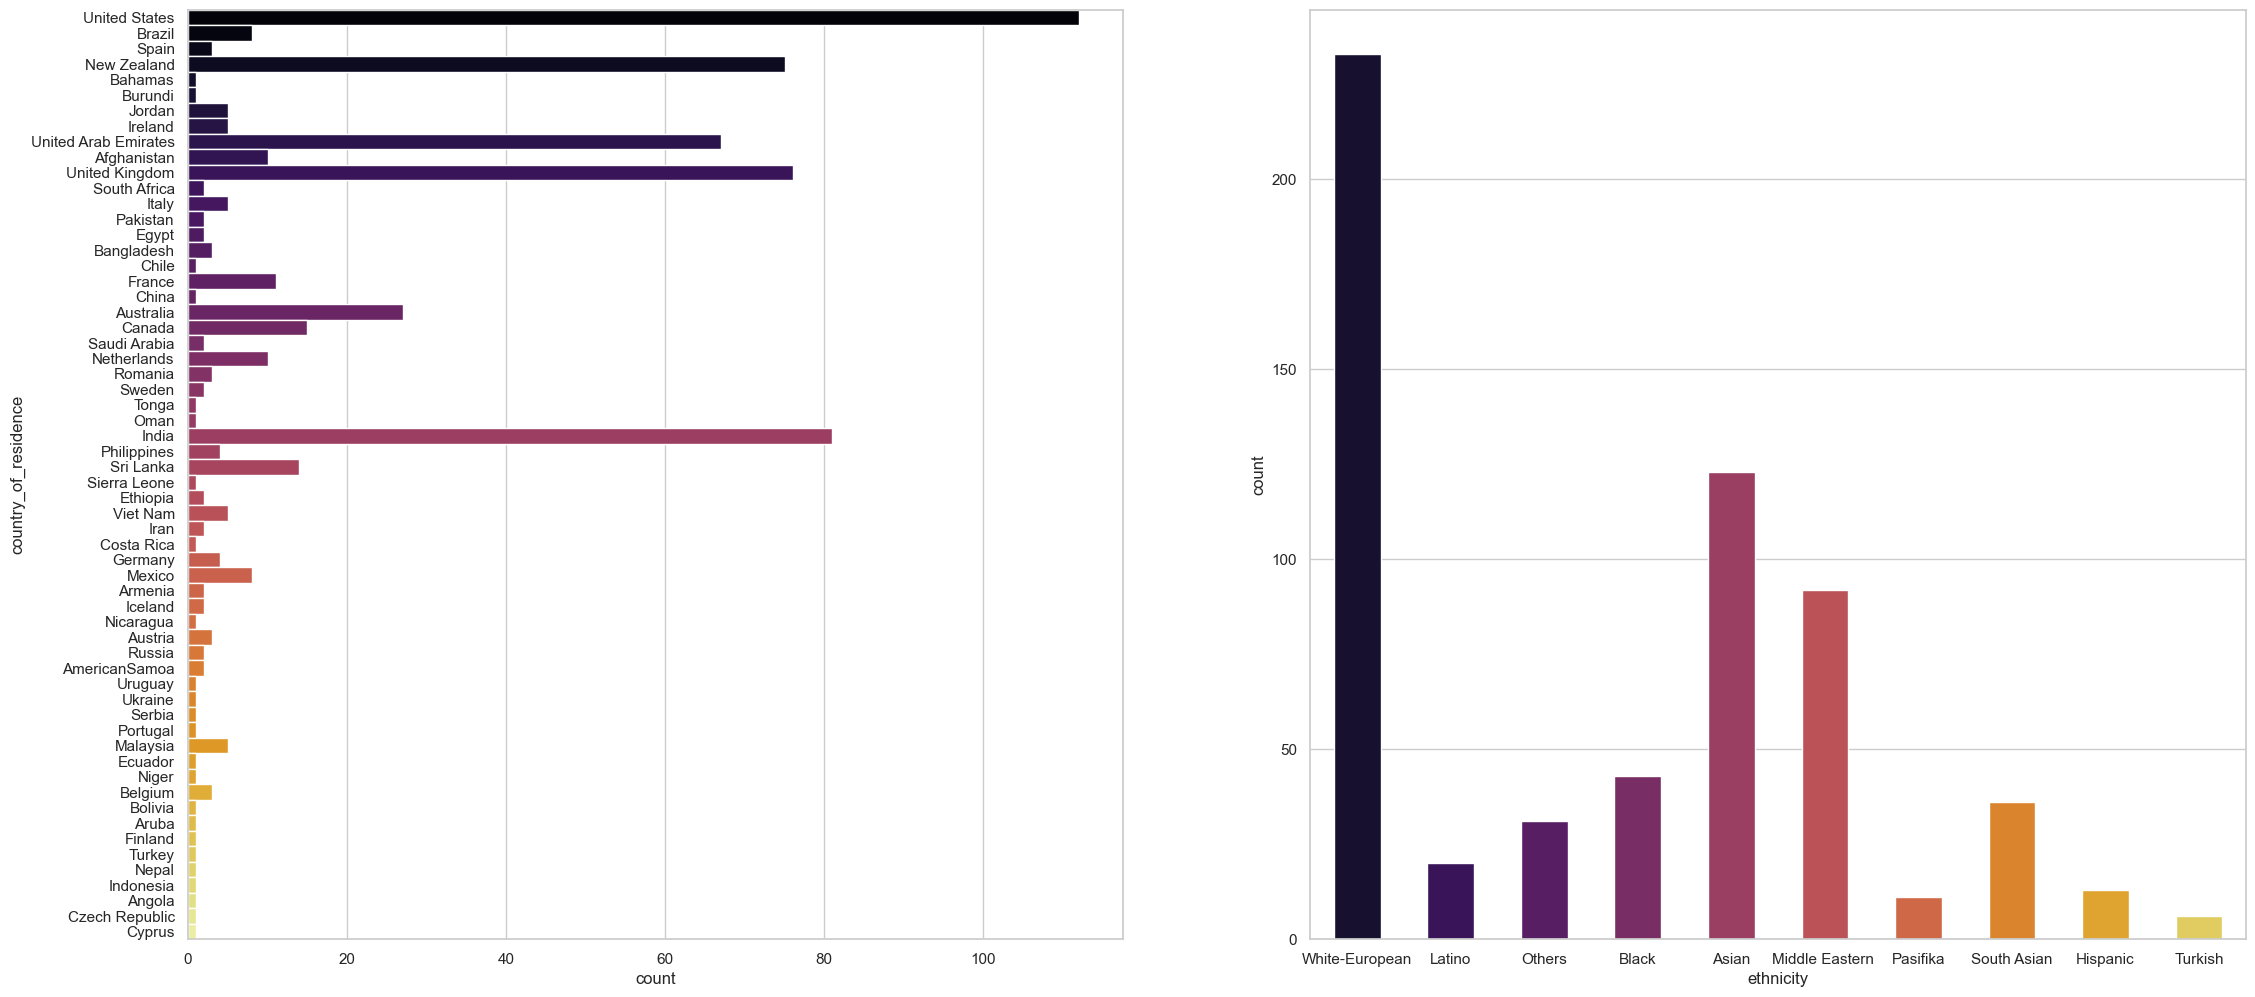

In [132]:
plt.figure(figsize=(70,70)) 

# Plot para país de residência
ax = plt.subplot(5,5, 1)
sns.countplot(df, y = 'country_of_residence', width = 1, palette='inferno')

# Plot para etnia 
ax = plt.subplot(5,5, 2)
sns.countplot(df, x = 'ethnicity', width = 0.5, palette='inferno', orient='h')

A análise dos gráficos referentes ao país de residência e à etnia dos entrevistados revela informações sobre a composição demográfica da amostra. 

* A maioria dos participantes reside dos Estados Unidos, Nova Zelândia, Reino Unido, Emirados Árabes Unidos e Índia. Por outro lado, os países com menor representação na amostra incluem Tonga, Omã, Uruguai e Ucrânia. 

* Em relação à etnia, os dados indicam que a maioria dos entrevistados se identifica como branco europeu, seguida por asiáticos e pessoas do Oriente Médio, enquanto a minoria da amostra é composta por indivíduos identificados como turcos, do pacífico e hispânicos.



Na abordagem anterior, a análise das variáveis qualitativas e binárias foi realizada sem o foco no diagnóstico de TEA, isto é apenas em termos de contagem de frequências, fornecendo uma visão geral. Podemos compará-las em função do diagnóstico, facilitando a identificação de padrões, hipóteses sobre os fatores relacionados ao transtorno.

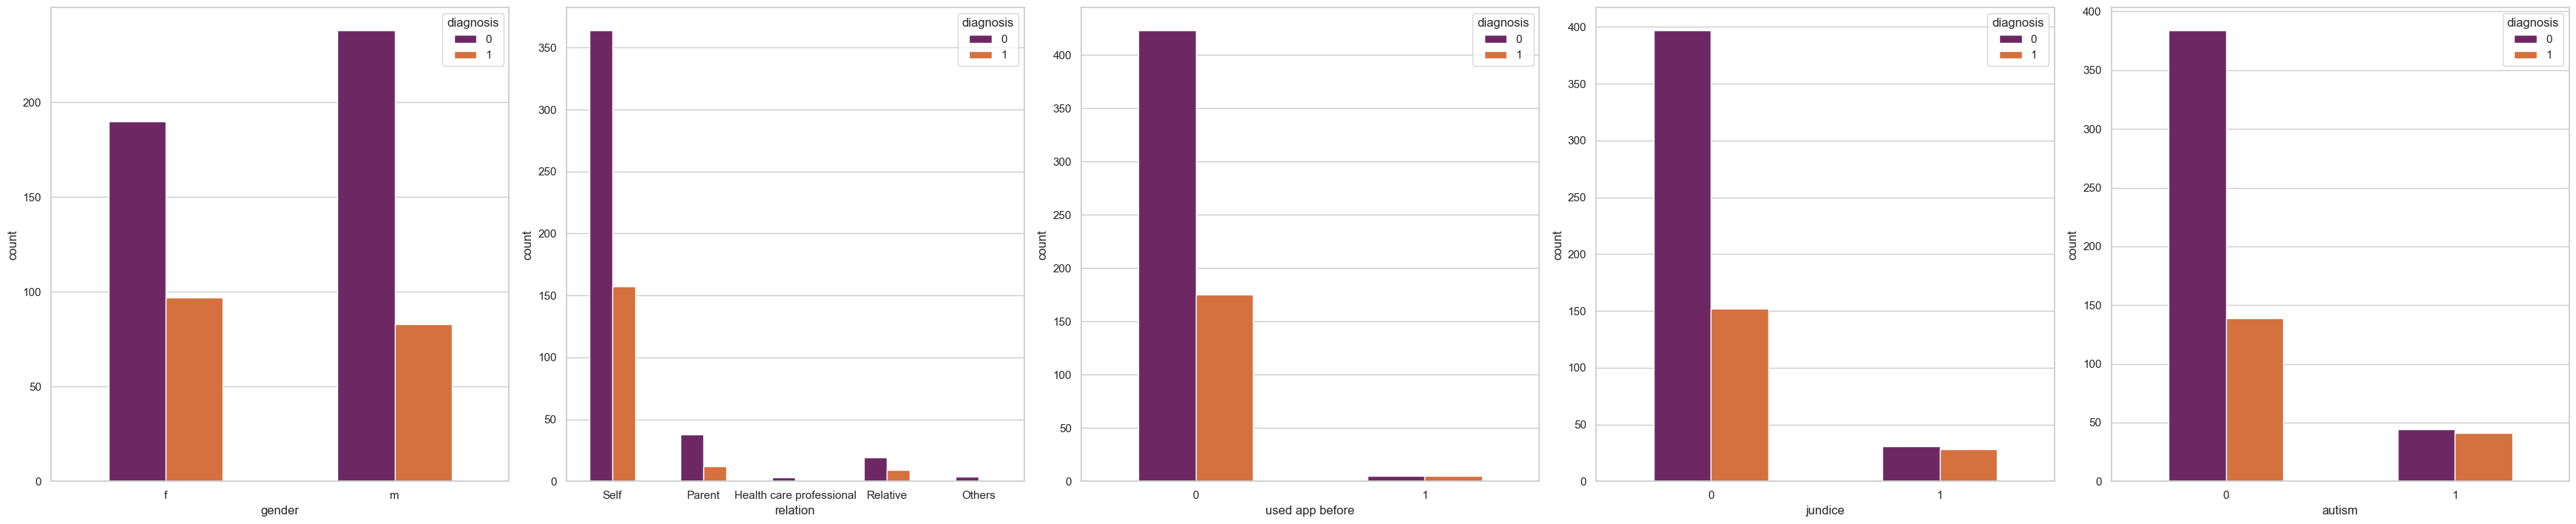

In [133]:
plt.figure(figsize=(35, 35))

# Gender plot
ax = plt.subplot(5,5, 1)
sns.countplot(df, x = 'gender', width = 0.5, palette='inferno', hue= 'diagnosis')
plt.xlabel('gender')


# Relation plot 
ax = plt.subplot(5, 5, 2)
sns.countplot(df, x = 'relation', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('relation')


#Used app before plot
ax = plt.subplot(5, 5, 3)
sns.countplot(df, x = 'used_app_before', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('used app before')

#Jundice plot
ax = plt.subplot(5, 5, 4)
sns.countplot(df, x = 'jundice', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('jundice')


#
ax = plt.subplot(5, 5, 5)
sns.countplot(df, x = 'relative_with_autism', width = 0.5, palette = 'inferno', hue='diagnosis')
plt.xlabel('autism')


plt.tight_layout() 
plt.show()


Embora as mulheres representem a minoria na amostra, a maioria dos casos de autismo foi registrada entre elas. Além disso, observou-se que, em casos positivos de icterícia, não existe uma discrepância significativa entre diagnósticos positivos e negativos. O mesmo padrão é observado em relação a históricos familiares de autismo, onde as alturas das colunas nos gráficos indicam que a quantidade de casos positivos e negativos está próxima. Esses dados sugerem que, possivelmente, tanto a icterícia ao nascer quanto o histórico familiar não são fatores determinantes no diagnóstico de autismo, pelo menos dentro do contexto do nosso conjunto de dados.

<Axes: xlabel='ethnicity', ylabel='count'>

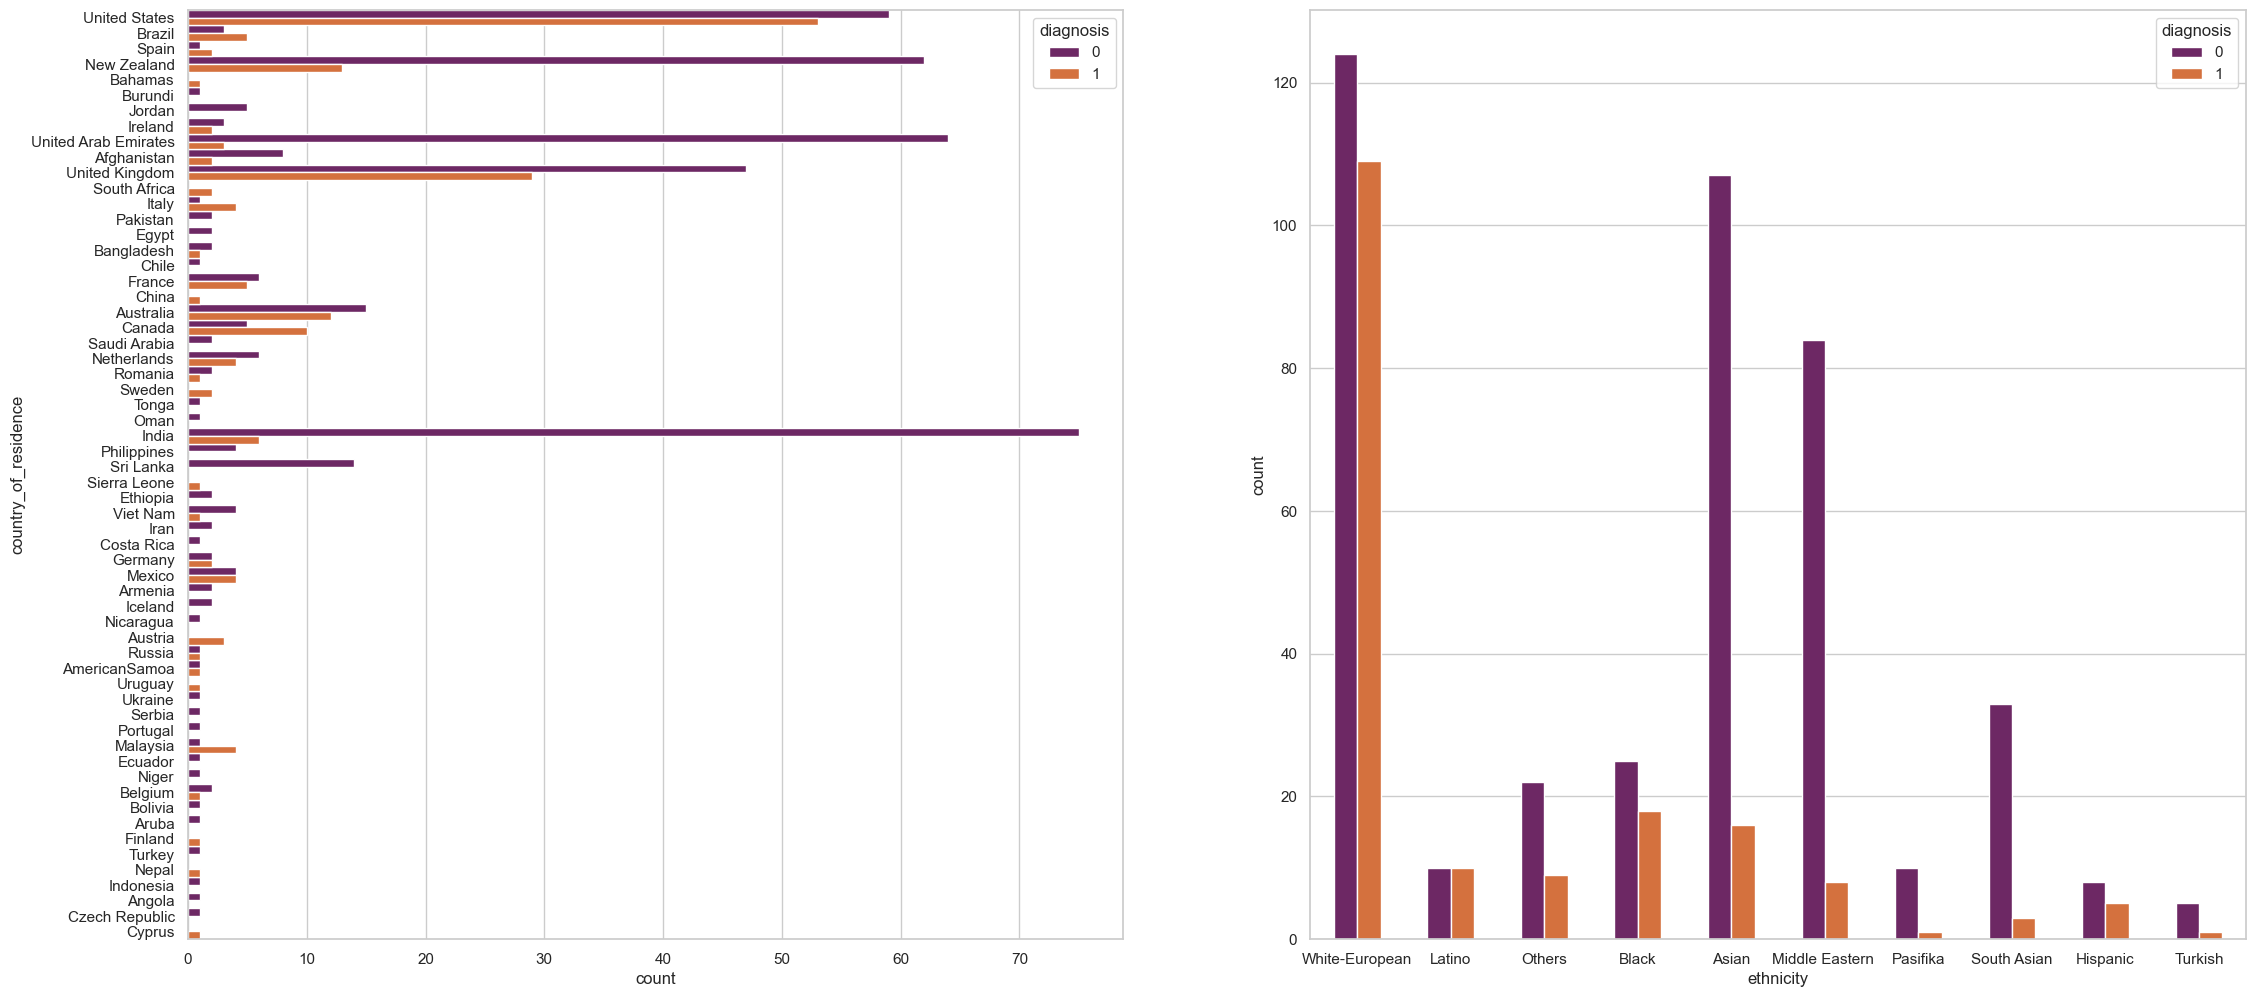

In [134]:
plt.figure(figsize=(70,70)) 

# Plot para país de residência
ax = plt.subplot(5,5, 1)
sns.countplot(df, y = 'country_of_residence', width = 1, palette='inferno', hue='diagnosis')

# Plot para etnia 
ax = plt.subplot(5,5, 2)
sns.countplot(df, x = 'ethnicity', width = 0.5, palette='inferno', orient='h', hue='diagnosis')

A análise dos dados revela que os Estados Unidos e o Reino Unido apresentam a maior incidência de diagnósticos positivos para o Transtorno do Espectro Autista (TEA). 

* O Brasil mostra uma predominância de casos positivos. 
* Em contraste, a África do Sul e a Áustria registram exclusivamente casos positivos. 
* Observa-se que a Índia tem uma maioria de diagnósticos negativos, enquanto o Sri Lanka apresenta apenas casos negativos.

No que diz respeito à etnia, os europeus brancos possuem o maior número de casos positivos, mas a discrepância entre os diagnósticos positivos e negativos é relativamente menor em comparação com outras etnias. Em contrapartida, as populações asiáticas, do Oriente Médio e do Sul da Ásia demonstram uma tendência maior para diagnósticos negativos. Por outro lado, os latinos apresentam uma distribuição equilibrada, com igual número de casos positivos e negativos. 

Essa análise sugere a necessidade de investigar os fatores culturais e sociais que podem influenciar a prevalência do TEA nas diferentes regiões e grupos étnicos.


#### A1_10-Scores
A mesma abordagem de comparação com o diagnóstico será aplicada às questões, considerando que essas perguntas refletem aspectos comportamentais, suas respostas podem fornecer indícios significativos sobre a relação entre esses comportamentos e o diagnóstico de TEA. 

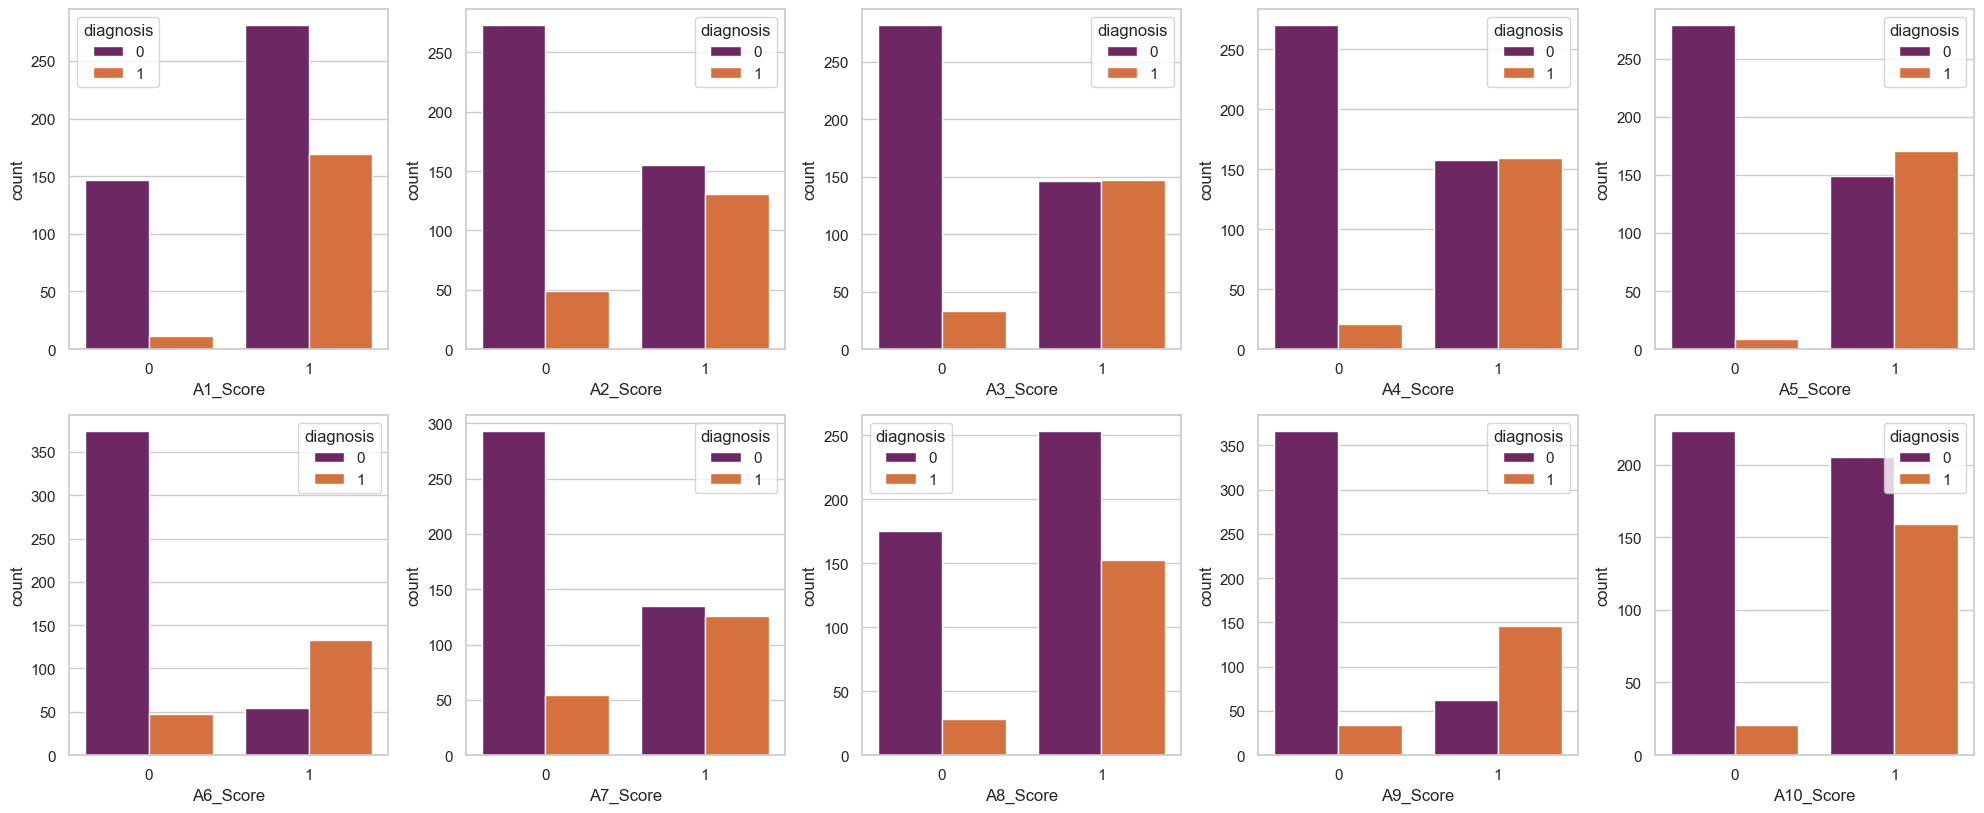

In [135]:
answers = [column for column in df.columns if '_Score' in column]

plt.figure(figsize=(20,20))

plot_number = 1

for answer in answers: 
    ax = plt.subplot(5,5, plot_number)
    sns.countplot(df, x = answer, palette='inferno', hue='diagnosis')

    plot_number += 1

plt.tight_layout() 
plt.show() 

Não foi possível identificar padrões claros nas respostas comportamentais em relação ao diagnóstico. Entretanto, observou-se que a maioria dos indivíduos com diagnóstico positivo respondeu afirmativamente à questão 5. Por fim, vamos comparar o resultado do teste (soma da resposta positiva as perguntas) em comparação ao diagnóstico. 

<Axes: xlabel='result', ylabel='count'>

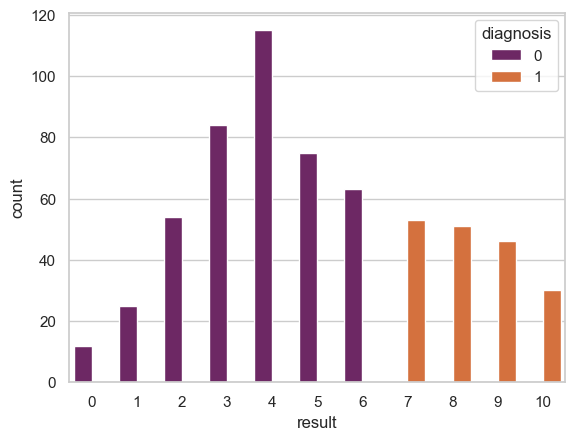

In [136]:
sns.countplot(df, x = 'result', palette='inferno', hue='diagnosis', dodge=True)

A análise dos resultados do teste, que reflete a soma das respostas positivas, revelou um padrão significativo: todos os indivíduos diagnosticados com Transtorno do Espectro Autista (TEA) apresentaram respostas afirmativas a mais de seis questões. Essa associação sugere que "result" pode desempenhar um papel crucial na identificação de casos de autismo.

Ao introduzirmos os pairplots, a estratégia se concentra na comparação das diferentes features e na análise de sua importância em conjunto para o diagnóstico de TEA. Essa abordagem permite visualizar como as variáveis interagem entre si e sua influência.

<Figure size 4000x4000 with 0 Axes>

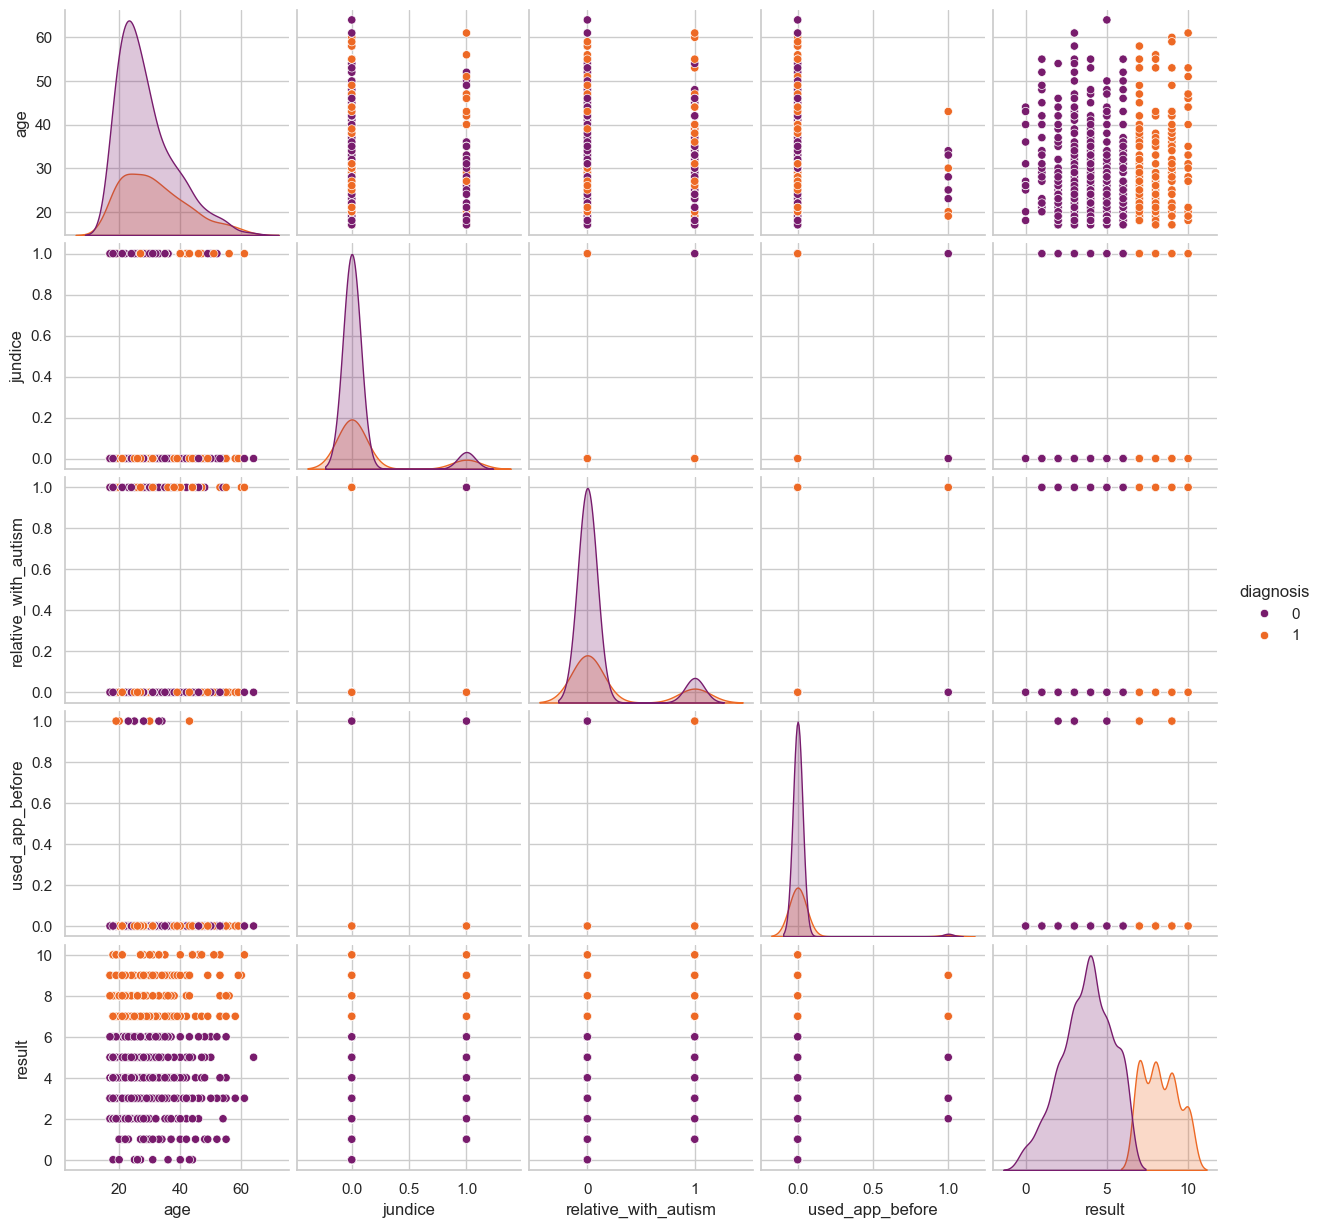

In [137]:
columns = [column for column in df.columns if '_Score' not in column]


plt.figure(figsize=(40,40))

sns.pairplot(df[columns], hue='diagnosis', palette='inferno')

 Com a variável *result*, há uma separação clara entre os diagnósticos positivos e negativos, fornecendo uma outra forte evidência de sua importância para o diagnóstico de TEA.

#### Histogramas

Utilizaremos histogramas para analisar as variáveis *age*  e *resultado*. Um histograma é uma representação gráfica que mostra a distribuição de frequências de um conjunto de dados, o que permitirá visualizar como as idades dos indivíduos e resultados estão distribuídos. 

<Axes: xlabel='age', ylabel='Count'>

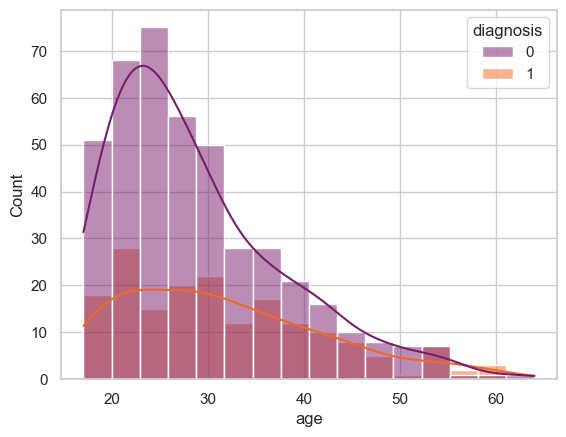

In [138]:
sns.histplot(df, x = 'age', palette= 'inferno', kde=True, hue='diagnosis')

Observamos uma assimetria à direita em nosso conjunto de dados. Na prática isso significa que a maioria das observações está abaixo da média. A maioria dos indivíduos está concentrada na faixa etária entre 20 e 30 anos, enquanto a minoria se encontra na faixa de 30 a 60 anos. 

* Essa distribuição demonstra que o grupo de participantes é predominantemente jovem. 

<Axes: xlabel='result', ylabel='Count'>

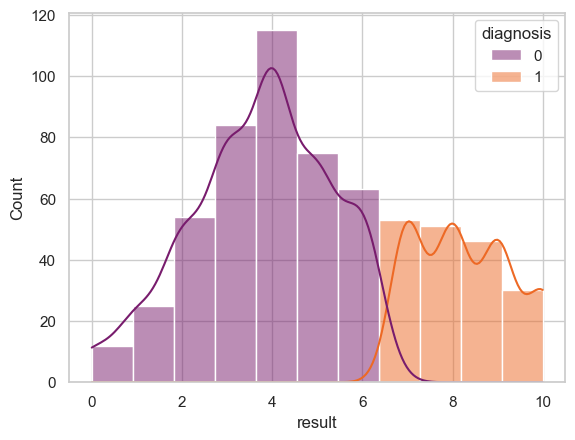

In [139]:
sns.histplot(df, x = 'result', palette= 'inferno', kde=True, hue='diagnosis')

Para a variável result, embora não haja uma assimetria tão acentuada como no caso anterior,  observa-se uma concentração das respostas nos valores de 3, 4 e 5 questões positivas. 

* A maioria dos indivíduos não diagnosticados com TEA tende a responder positivamente ao um número intermediário de perguntas. 
* A minoria dos indivíduos apresenta resultados inferiores a 2.
* Novamente, é importante destacar que todos os indivíduos diagnosticados com TEA responderam positivamente a mais de 6 perguntas.

#### Violin plots

O violin plot é uma visualização que combina características do boxplot com uma estimativa de densidade de kernel (similar ao que vemos nos histogramas) Ele exibe a distribuição dos dados ao longo de um eixo, mostrando a forma e concentração dos valores. As áreas mais largas representam maior densidade, enquanto áreas estreitas indicam menos dados. O intuito com os Violin plots é unir diferentes features e comparar distribuições de forma conjunta.


<Axes: ylabel='age'>

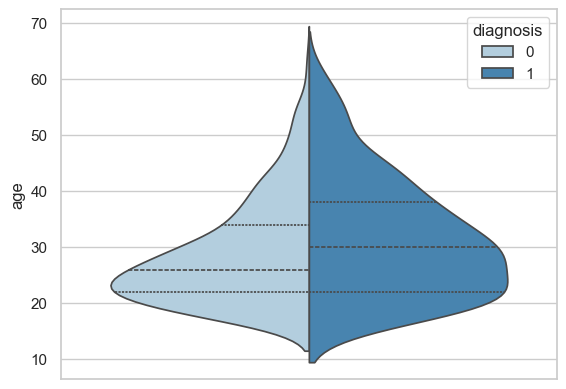

In [140]:
sns.violinplot(data=df, y = 'age', inner='quartile', palette='Blues', hue = 'diagnosis', split=True)


* Para a variável idade, observamos que os diagnósticos negativos apresentam valores mais baixos nos quartis 1, 2 (mediana) e 3 em comparação aos diagnósticos positivos. Para esses casos, a maioria das idades está em valores mais baixos em comparação aos diagnósticos positivos. Mais uma vez, percebemos uma maior concentração de idades entre indivíduos mais jovens para os diagnósticos negativos.

<Axes: ylabel='result'>

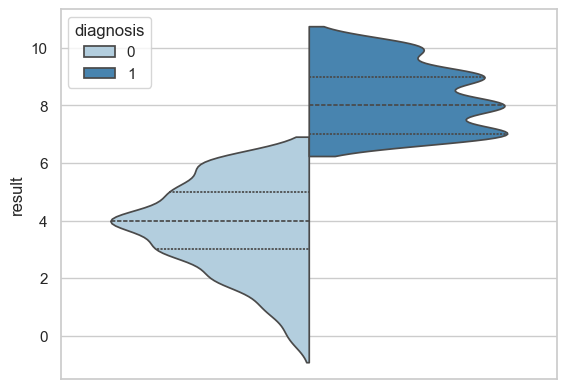

In [141]:
sns.violinplot(data=df, y = 'result', inner='quartile', palette='Blues', hue = 'diagnosis', split=True)

 * Para a variável result, observamos novamente que os diagnósticos positivos tendem a se concentrar em valores superiores a 6. 


<Axes: xlabel='jundice', ylabel='result'>

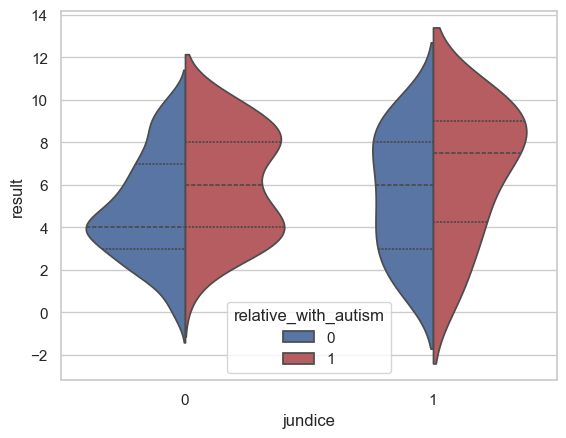

In [143]:
sns.violinplot(x="jundice", y="result", hue="relative_with_autism", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

Uniremos features para análisá-las em conjunto: 

<Axes: xlabel='jundice', ylabel='result'>

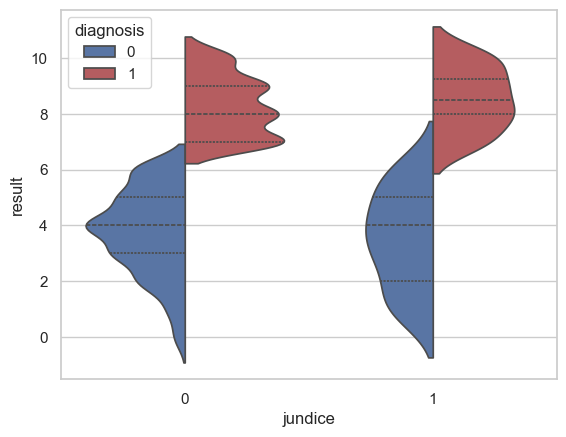

In [243]:
sns.violinplot(x="jundice", y="result", hue="diagnosis", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

<Axes: xlabel='gender', ylabel='result'>

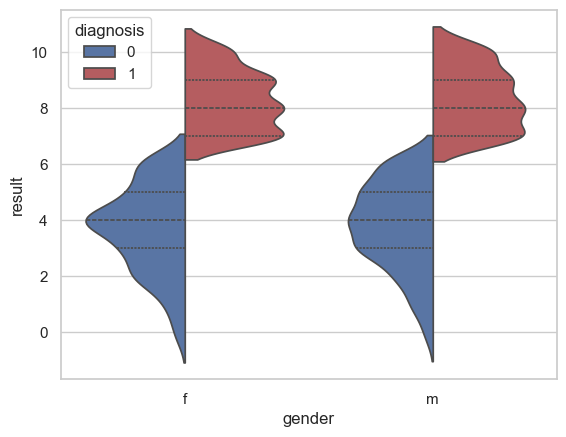

In [244]:
sns.violinplot(x="gender", y="result", hue="diagnosis", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

<Axes: xlabel='autism', ylabel='result'>

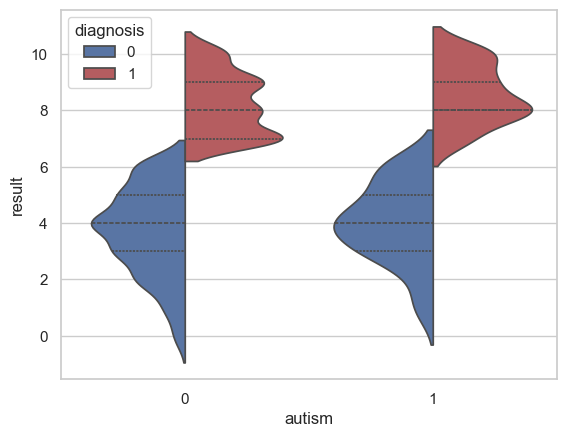

In [254]:
sns.violinplot(x="autism", y="result", hue="diagnosis", data=df, split=True,
                inner="quartile", palette={ 1 : "r", 0 : "b"})

Nessas abordagens, buscamos entender o impacto dos fatores nascimento com icterícia e parentes diretos diagnosticados com TEA sobre o resultado. 

* Observamos que a maioria dos diagnosticados que nasceram com icterícia e têm parentes com TEA apresentam valores de result mais altos, indicando uma possível relação entre esses fatores e resultados elevados. Em contrapartida, aqueles sem histórico de icterícia ao nascer e sem parentes diagnosticados tendem a se concentrar em valores de result próximos a 4, sugerindo um padrão de menor intensidade nos resultados para esses indivíduos.

 Com comparações focadas no diagnóstico confirmamos o fenômeno previamente observado: os indivíduos diagnosticados como positivos concentram-se em valores mais altos de resultado, reforçando a distinção entre grupos de diagnóstico com base nos escores obtidos. Isso fica mais evidente no gráfico abaixo:

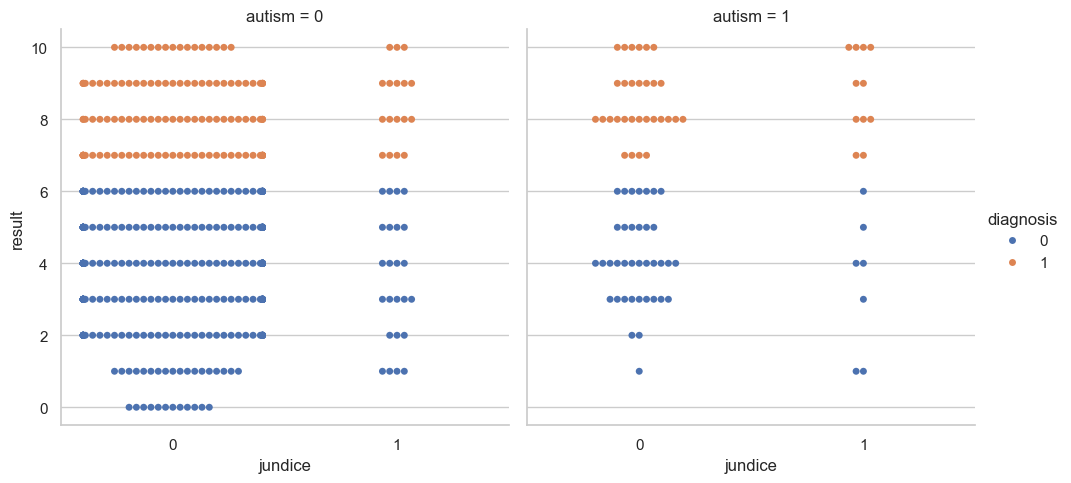

In [258]:
sns.catplot(x="jundice", y="result", hue="diagnosis", col="autism", data=df, kind="swarm");

#### Correlação entre as variáveis 
##### Coeficiente Phi (Φ)
A correlação entre variáveis binárias é uma forma de entender a associação entre duas variáveis categóricas com respostas "sim" ou "não" (ou "1" e "0"). Essa análise é útil para explorar como as respostas para uma pergunta podem estar relacionadas às respostas para outra, ou como a presença de uma característica está associada à presença de outra.

O coeficiente phi (Φ) é uma medida de correlação específica para variáveis binárias, também chamado de correlação de Pearson para variáveis dicotômicas. Esse coeficiente é calculado a partir de uma tabela de contingência 2x2 e varia de -1 a 1, onde:

* Φ = 1 indica uma correlação positiva perfeita, ou seja, quando um participante responde "sim" a uma pergunta, é mais provável que ele também responda "sim" a outra.
* Φ = -1 indica uma correlação negativa perfeita, ou seja, quando um participante responde "sim" a uma pergunta, é mais provável que ele responda "não" à outra.
* Φ = 0 indica ausência de correlação, ou seja, as respostas para uma pergunta não estão associadas às respostas para a outra.

Ao analisar o coeficiente phi, conseguimos entender se responder "positivo" (ou "sim") a uma pergunta está correlacionado com responder "positivo" a outra. Isso é especialmente relevante em pesquisas ou estudos onde queremos verificar se certas características tendem a ocorrer juntas em um grupo de participantes, tal como o nosso contexto analisado.


* Para isso, utilizamos o método .corr(), já que o coeficiente phi é equivalente à correlação de Pearson quando aplicado a variáveis binárias (0 e 1).

<Axes: >

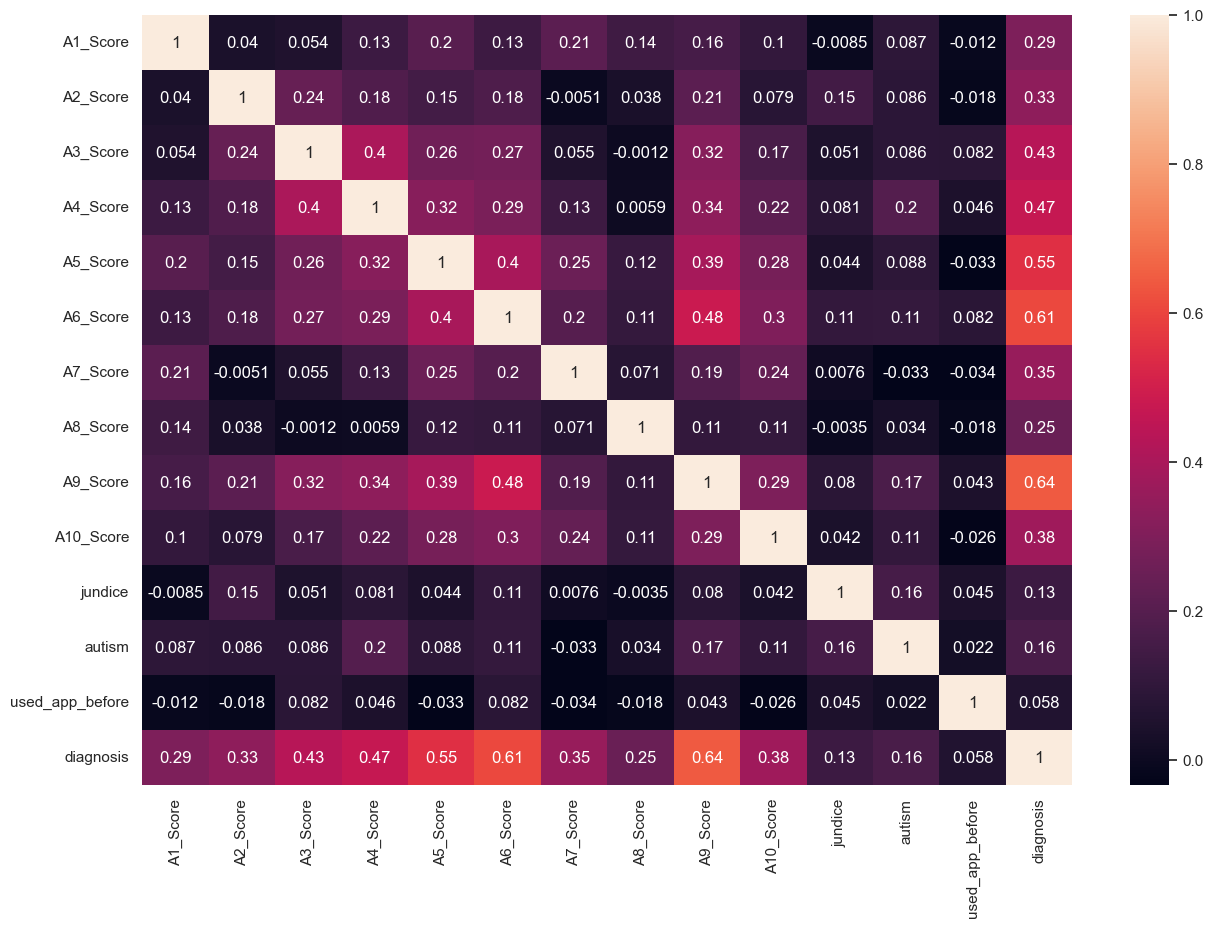

In [267]:
plt.figure(figsize=(15,10))

sns.heatmap(df[[col for col in numeric_columns if col != 'age' and col != 'result']].corr(), annot=True)


* Observamos que a variável relative_with_autism apresenta uma alta correlação com as questões 1, 2, 3 e 4, sugerindo que é provável que um participante que tenha um parente diagnosticado responda positivamente a essas questões. Além disso, notamos uma correlação significativa entre a variável jundice (nascimento com icterícia) e a resposta para a questão 4, indicando que a presença de icterícia ao nascer também pode estar associada a respostas positivas nessa questão.

* Adicionalmente, as questões 6 e 9 mostram uma correlação relevante de 0,61 com o diagnóstico, sugerindo uma associação considerável entre as respostas a essas perguntas e o diagnóstico em análise.

### Aprendizado supervisionado
#### *Feature Engineering*

A questão de como representar nossa base de dados da melhor forma para um caso específico é conhecida como feature engineering (ou engenharia de características). Representar os dados de maneira adequada pode ter uma influência maior no desempenho de um modelo supervisionado do que os parâmetros exatos escolhidos para ele.

#### One-Hot-Coding: 

Como exposto anteriormente, existem várias características que são não numéricas na base de dados, como country_of_residence (país de residência) e ethnicity (etnia). Normalmente, os algoritmos de aprendizado esperam que a entrada seja numérica, o que requer que as características não numéricas sejam convertidas. Uma maneira popular de converter variáveis categóricas é usando a one-hot encoding (codificação one-hot).Esse método cria uma nova coluna binária para cada categoria da variável. Por exemplo, se a variável "country_of_residence" tiver três categorias (como "Brasil", "EUA" e "Reino Unido"), a one-hot encoding criará três colunas, uma para cada país, com valores 1 ou 0 indicando a presença ou ausência de cada categoria em um registro específico.

| someFeature | someFeature_A | someFeature_B | someFeature_C |
|-------------|---------------|---------------|---------------|
| B           | 0             | 1             | 0             |
| C           | 0             | 0             | 1             |
| A           | 1             | 0             | 0             |


* Utilizando o pandas.get_dummies() para realizar o one-hot enconding:





In [97]:
print("Features originais:\n", list(df.columns), "\n")
data_dummies = pd.get_dummies(df) 
# Features after get dummies
print("Número total de features:", len(list(data_dummies.columns)), "\n")

print("Novas features: \n", data_dummies.columns)

Features originais:
 ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'relative_with_autism', 'country_of_residence', 'used_app_before', 'result', 'age_desc', 'relation', 'diagnosis'] 

Número total de features: 94 

Novas features: 
 Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'jundice',
       'relative_with_autism', 'used_app_before', 'result', 'diagnosis',
       'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian',
       'ethnicity_Turkish', 'ethnicity_White-European',
       'country_of_residence_Afghanistan',
       'country_of_residence_AmericanSamoa', 'country_of_residence_Angola',
       'country_of_residence_

In [146]:
data_dummies.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_of_residence_United Kingdom,country_of_residence_United States,country_of_residence_Uruguay,country_of_residence_Viet Nam,age_desc_18 and more,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,1,1,1,0,0,1,1,0,0,...,False,True,False,False,True,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,1,1,0,1,1,1,1,...,False,False,False,False,True,False,False,True,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
5,1,1,1,1,1,0,1,1,1,1,...,False,True,False,False,True,False,False,False,False,True


#### Divisão em conjunto de teste e treinamento

* 80% dos dados serão usados para o treinamento e 20% para teste.

In [147]:
from sklearn.model_selection import train_test_split

X = data_dummies.drop('diagnosis', axis = 1)
y = data_dummies['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Resultado da divisão
print("Distribuição no conjunto de treinamento:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição no conjunto de teste:")
print(y_test.value_counts(normalize=True))


Distribuição no conjunto de treinamento:
diagnosis
0    0.713992
1    0.286008
Name: proportion, dtype: float64

Distribuição no conjunto de teste:
diagnosis
0    0.663934
1    0.336066
Name: proportion, dtype: float64


#### Decision Trees
Uma tarefa importante ao realizar aprendizado supervisionado em um conjunto de dados, como o em questão, é determinar quais características oferecem o maior poder preditivo. Ao nos concentrarmos na relação entre apenas algumas características cruciais e o rótulo alvo (diagnóstico), simplificamos nossa compreensão do fenômeno. No caso deste projeto, isso significa que desejamos identificar um pequeno número de características que preveem de forma mais eficaz se um indivíduo tem ou não Transtorno do Espectro Autista (TEA). Nesse contexto, obtivemos fortes evidências para a variável result, durante a nossa análise exploratória de dados. 

Portanto, escolhemos um classificador que contenha o atributo feature_importances, que é uma função que justamente classifica a importância das características, possibilitando uma comprovação de nossas hipóteses. Também porque o entendimento do funcionamento desse modelo é simples, baseando-se essencialmente na construção de uma hierarquia entre if e elses, que levam a uma decisão (diagnóstico ou não de TEA).

In [189]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=4) 
# Treinando o modelo 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### Avaliação dos modelos

* O F1-score é a média harmônica entre precisão e recall, proporcionando uma única métrica que considera tanto os falsos positivos quanto os falsos negativos.

 No contexto do autismo, tanto recall e precisão são especialmente importantes, seja pelo primeiro caso de perder um caso de autismo (falso negativo) pode significar que o indivíduo não recebe o suporte necessário, tanto isso pode ser relevante se um diagnóstico incorreto (falso positivo), já que levar a intervenções desnecessárias.

Dada a natureza crítica do diagnóstico do autismo, onde tanto falsos positivos quanto falsos negativos podem ter consequências significativas, uma boa prática é avaliar múltiplas métricas. No entanto, o F1-score é frequentemente considerado uma medida robusta, pois equilibra a precisão e o recall. 

* Consideramos a F1-score como uma das métricas principais, juntamente com a análise da precisão e do recall, será uma abordagem eficaz para avaliar o desempenho dos modelos.

In [186]:
from sklearn.metrics import classification_report

prediction = decision_tree.predict(X_test)

print("Acurácia no conjunto de treinamento:", decision_tree.score(X_train, y_train), "\n")
print("Acurácia no conjunto de teste:", decision_tree.score(X_test, y_test), "\n")

report = classification_report(y_test, prediction, output_dict=True)
report_df = pd.DataFrame(report).transpose() 

print(report_df)


Acurácia no conjunto de treinamento: 1.0 

Acurácia no conjunto de teste: 1.0 

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     81.0
1                   1.0     1.0       1.0     41.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    122.0
weighted avg        1.0     1.0       1.0    122.0


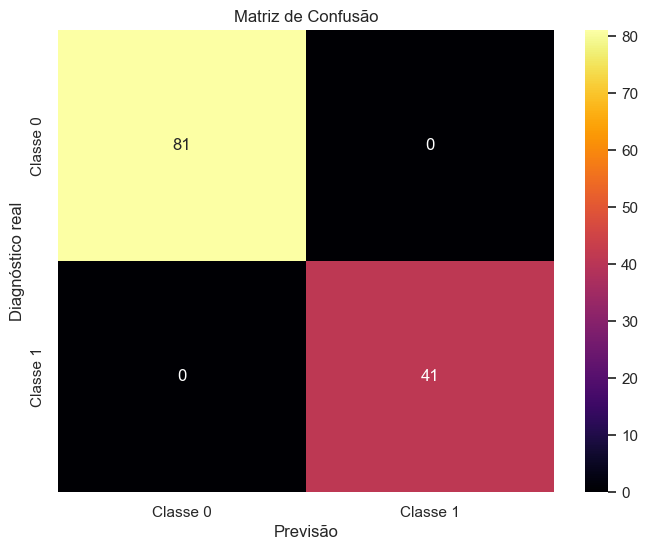

In [187]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8,6)) 
sns.heatmap(matrix, annot=True, cmap='inferno', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.ylabel('Diagnóstico real')
plt.xlabel('Previsão')
plt.title('Matriz de Confusão')
plt.show() 

### Mensurando a importância das features 


.feature_importances_ mensura o quão importante é cada feature para a decisão do modelo, sendo um número entre 0 e 1, onde 0 significa algo "não é utilizado" e 1 "prevê perfeitamente a saída".

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


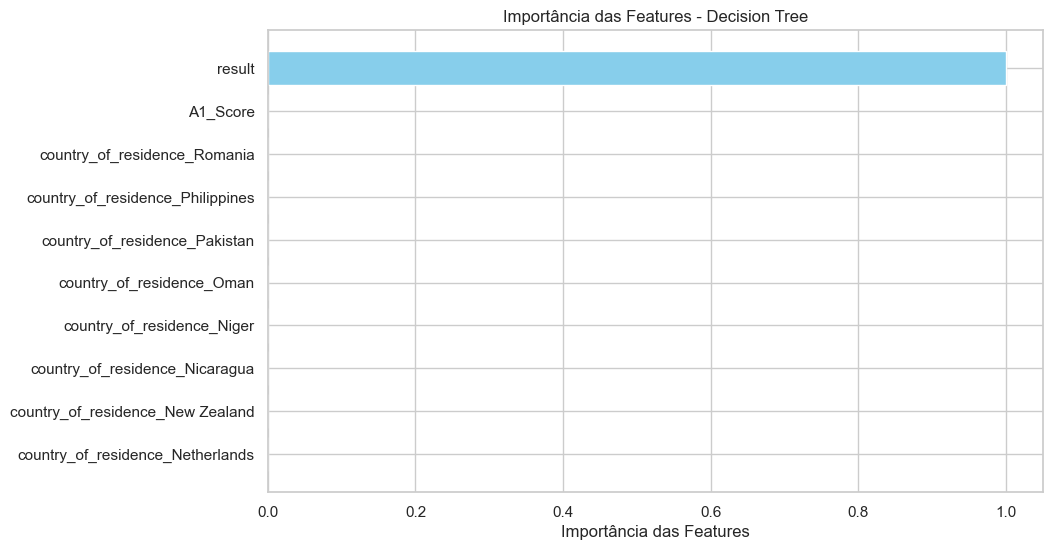

In [196]:
importances = decision_tree.feature_importances_

print(importances)

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importância das Features')
plt.title('Importância das Features - Decision Tree')
plt.gca().invert_yaxis()  
plt.show()




#### Feature Selection 
Precisamos considerar como o desempenho de um modelo é afetado quando usamos apenas um subconjunto de todas as características disponíveis no conjunto de dados. Ao reduzir o número de características necessárias para o treinamento, podemos esperar uma diminuição significativa tanto no tempo de treinamento quanto no tempo de previsão.
A partir da visualização acima, podemos observar que a características mais importante é justamente o resultado do teste, exercendo influência dominante sobre o algoritmo. Podemos efetivamente reduzir o espaço das características e simplificar as informações que o modelo requer para aprender. 

* Essa abordagem não só simplifica o modelo, mas também aumenta a interpretabilidade, permitindo-nos focar nos fatores mais impactantes que impulsionam as previsões.

### Reconstruindo o modelo sem a variável 'Result'.


In [200]:
data_without_result = df.drop(columns=['result'])

data_without_result_dummies = pd.get_dummies(data_without_result)

X_without_result = data_without_result_dummies.drop('diagnosis', axis = 1)
y_without_result = data_without_result_dummies['diagnosis']


In [201]:
data_without_result_dummies.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_of_residence_United Kingdom,country_of_residence_United States,country_of_residence_Uruguay,country_of_residence_Viet Nam,age_desc_18 and more,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,1,1,1,0,0,1,1,0,0,...,False,True,False,False,True,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,1,1,0,1,1,1,1,...,False,False,False,False,True,False,False,True,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
5,1,1,1,1,1,0,1,1,1,1,...,False,True,False,False,True,False,False,False,False,True


In [199]:
# Construindo um novo modelo
X_train_without_result, X_test_without_result, y_train_without_result, y_test_without_result = train_test_split(X_without_result, y_without_result, test_size = 0.2, random_state=42)

In [205]:
decision_tree_without_result = DecisionTreeClassifier(max_depth=4)

decision_tree_without_result.fit(X_train_without_result, y_train_without_result)
prediction_without_result = decision_tree_without_result.predict(X_test_without_result)

print("Acurácia no conjunto de treinamento sem a variável result:", decision_tree_without_result.score(X_train_without_result, y_train_without_result), "\n")
print("Acurácia no conjunto de teste sem a variável result:", decision_tree_without_result.score(X_test_without_result, y_test_without_result), "\n")

report_without_result = classification_report(y_test_without_result, prediction_without_result, output_dict=True)
report_df_without_result = pd.DataFrame(report_without_result).transpose() 

print(report_df_without_result)


Acurácia no conjunto de treinamento sem a variável result: 0.9444444444444444 

Acurácia no conjunto de teste sem a variável result: 0.8852459016393442 

              precision    recall  f1-score     support
0              0.913580  0.913580  0.913580   81.000000
1              0.829268  0.829268  0.829268   41.000000
accuracy       0.885246  0.885246  0.885246    0.885246
macro avg      0.871424  0.871424  0.871424  122.000000
weighted avg   0.885246  0.885246  0.885246  122.000000


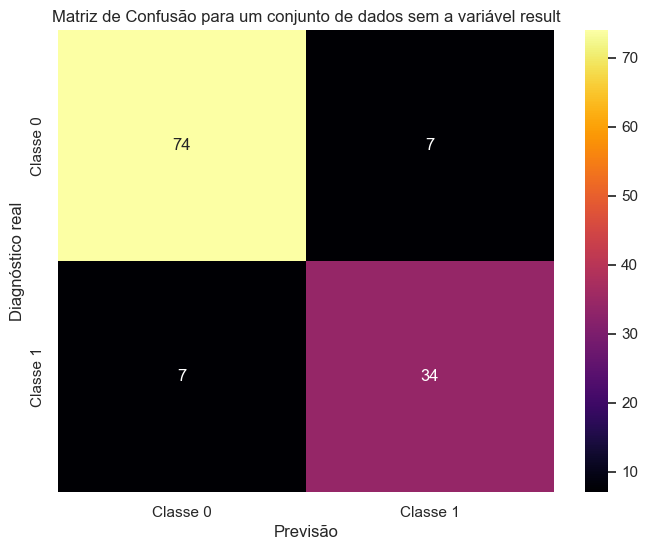

In [206]:
matrix_without_result = confusion_matrix(y_test_without_result, prediction_without_result)

plt.figure(figsize=(8,6)) 
sns.heatmap(matrix_without_result, annot=True, cmap='inferno', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.ylabel('Diagnóstico real')
plt.xlabel('Previsão')
plt.title('Matriz de Confusão para um conjunto de dados sem a variável result')
plt.show() 

#### Importância das features após a remoção de result

[0.09499683 0.         0.0525239  0.12350712 0.02958215 0.5122645
 0.05727148 0.         0.07878188 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01102657 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01238702 0.         0.         0.         0.
 0.         0.         0.01219297 0.         0.01546558 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


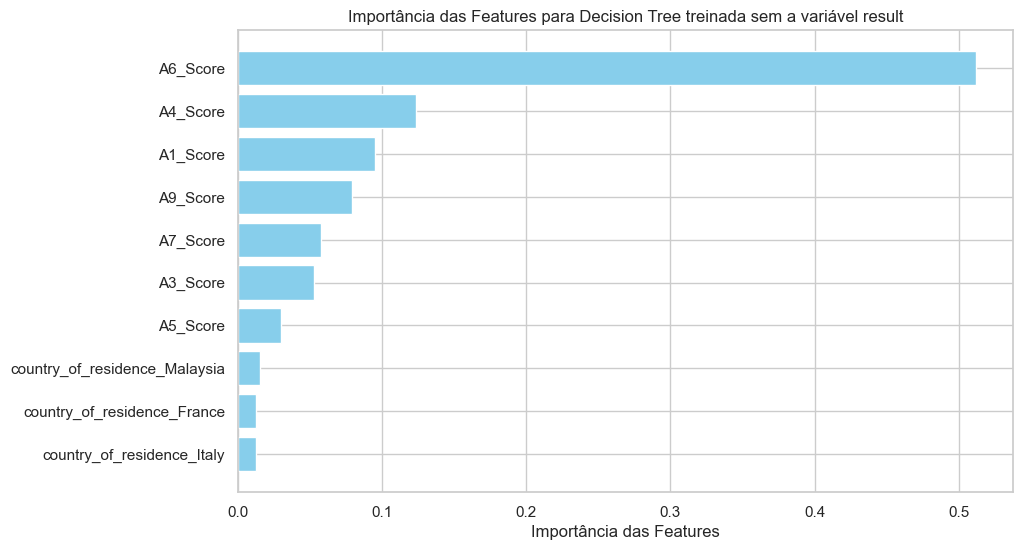

In [209]:
importances = decision_tree_without_result.feature_importances_

print(importances)

feature_names = X_train_without_result.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importância das Features')
plt.title('Importância das Features para Decision Tree treinada sem a variável result')
plt.gca().invert_yaxis()  
plt.show()



* Após a remoção da variável 'result', observou-se uma redução significativa nas métricas de avaliação do modelo, com uma acurácia de 88% e uma precisão de 91%, indicando a relevância dessa variável para o diagnóstico preciso do Transtorno do Espectro Autista (TEA).

* Além disso, essa estratégia de remoção possibilitou a análise importância das demais variáveis na classificação. Nota-se que a resposta à questão 6 assumiu a posição de feature mais relevante, com um valor superior a 0.5, sugerindo que os comportamentos associados a essa variável podem ser determinantes na caracterização de pacientes portadores de TEA, seguido das questões 4, 1, 8, 7, 3 e 5.

### Considerações finais 


Utilizando o conjunto de dados de TEA como entrada para diferentes modelos de aprendizado, observamos que todos os modelos apresentaram um desempenho extremamente satisfatório, com destaque para o caso das Árvores de Decisão, que atingiram uma classificação perfeita. Focamos nas métricas de acurácia, precisão e F1 score, que, de modo geral, também alcançaram resultados elevados. Esse alto desempenho pode ser explicado pela influência predominante que a variável result exerce sobre o diagnóstico, algo que foi demonstrado pela análise da importância das variáveis. Dessa forma, não se mostra necessária a construção de modelos complexos, uma vez que a relação é simples e direta.

No entanto, para o desenvolvimento de modelos ainda mais precisos, generalizáveis e aplicáveis, é imprescindível o acesso a conjuntos de dados maiores, já que o processo de limpeza reduziu ainda mais o número de amostras. Este trabalho pode servir como referência para futuras explorações que busquem modelos mais detalhados. De modo geral, os resultados obtidos ressaltam a relevância dos processos de triagem e da extração de traços comportamentais dos indivíduos para o diagnóstico de TEA, configurando-se como uma ferramenta adicional para a obtenção de diagnósticos precisos. Isso é particularmente relevante no contexto de autoavaliação, considerando que a maioria dos indivíduos neste estudo se autoavaliou.
